# Import

In [32]:
import statistics# -- 214
import numpy as np
import pandas as pd
from google.oauth2 import service_account #Control API Keys
from google.cloud import vision
import os, cv2
from collections import Counter
from IPython.display import Image
from shapely.geometry import Polygon
import io
from google.cloud.vision import types
from PIL import Image, ImageDraw, ImageFont
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import sys

## Set Paths

In [46]:
imagePath = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_619_1.jpg"
fontPath = '/Users/kunal/Documents/VdartResumeProject/Font/FreeMonoBold.ttf'

In [47]:
boldSections = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word']]

In [48]:
boldSections = [[((490, 70), (687, 70), (687, 135), (490, 135)), 105.0, 'Serhii', 'Word'], [((720, 70), (957, 70), (957, 135), (720, 135)), 104.29, 'Kalinin', 'Word'], [((490, 70), (957, 70), (957, 135), (490, 135)), 100.0, 'Serhii ', 'Para'], [((490, 70), (687, 70), (687, 135), (490, 135)), 102.78, 'Serhii', 'SymbolAvg'], [((720, 70), (957, 70), (957, 135), (720, 135)), 94.64, 'Kalinin', 'SymbolAvg'], [((490, 70), (957, 70), (957, 135), (490, 135)), 105.5556, 'N/A', 'SymbolAvg'], [((1086, 286), (1570, 290), (1570, 324), (1086, 320)), 33.3333, 'N/A', 'SymbolAvg'], [((1115, 287), (1171, 287), (1171, 320), (1115, 320)), 25.0, 'mail', 'Word'], [((1086, 287), (1102, 287), (1102, 320), (1086, 320)), 116.67, 'E', 'SymbolAvg'], [((1115, 287), (1171, 287), (1171, 320), (1115, 320)), 18.75, 'mail', 'SymbolAvg'], [((490, 290), (551, 290), (551, 318), (490, 318)), 18.75, '1180', 'SymbolAvg'], [((728, 291), (794, 291), (794, 319), (728, 319)), 32.5, 'West', 'Word'], [((728, 291), (794, 291), (794, 319), (728, 319)), 18.75, 'West', 'SymbolAvg'], [((731, 327), (778, 327), (778, 358), (731, 358)), 12.5, '1B4', 'SymbolAvg'], [((660, 328), (717, 328), (717, 359), (660, 359)), 12.5, 'M6E', 'SymbolAvg'], [((1246, 329), (1333, 329), (1333, 359), (1246, 359)), 28.0, 'Phone', 'Word'], [((1246, 329), (1333, 329), (1333, 359), (1246, 359)), 24.17, 'Phone', 'SymbolAvg'], [((94, 565), (165, 565), (165, 591), (94, 591)), 130.0, 'DATE', 'Word'], [((223, 565), (303, 565), (303, 591), (223, 591)), 104.0, 'BIRTH', 'Word'], [((94, 565), (165, 565), (165, 591), (94, 591)), 57.33, 'DATE', 'Capital'], [((223, 565), (303, 565), (303, 591), (223, 591)), 64.6, 'BIRTH', 'Capital'], [((94, 565), (165, 565), (165, 591), (94, 591)), 92.71, 'DATE', 'SymbolAvg'], [((176, 565), (211, 565), (211, 591), (176, 591)), 81.25, 'OF', 'SymbolAvg'], [((223, 565), (303, 565), (303, 591), (223, 591)), 67.5, 'BIRTH', 'SymbolAvg'], [((94, 565), (303, 565), (303, 591), (94, 591)), 89.4444, 'N/A', 'SymbolAvg'], [((92, 696), (140, 696), (140, 719), (92, 719)), 86.67, 'AIM', 'Word'], [((92, 696), (140, 696), (140, 719), (92, 719)), 51.39, 'AIM', 'SymbolAvg'], [((92, 696), (140, 696), (140, 719), (92, 719)), 55.5556, 'N/A', 'SymbolAvg'], [((92, 826), (232, 825), (232, 848), (92, 849)), 100.29, 'SUMMARY', 'Word'], [((92, 826), (232, 825), (232, 848), (92, 849)), 100.0, 'SUMMARY', 'Capital'], [((92, 826), (232, 825), (232, 848), (92, 849)), 57.14, 'SUMMARY', 'SymbolAvg'], [((92, 826), (232, 825), (232, 848), (92, 849)), 57.1429, 'N/A', 'SymbolAvg'], [((410, 1166), (481, 1166), (481, 1200), (410, 1200)), 26.0, 'Being', 'Word'], [((430, 1387), (748, 1390), (748, 1423), (430, 1420)), 3.7037, 'N/A', 'SymbolAvg'], [((430, 1388), (488, 1389), (488, 1421), (430, 1420)), 43.33, 'Web', 'Word'], [((430, 1388), (488, 1389), (488, 1421), (430, 1420)), 27.78, 'Web', 'SymbolAvg'], [((93, 1396), (188, 1396), (188, 1422), (93, 1422)), 65.0, 'SKILLS', 'Word'], [((93, 1396), (188, 1396), (188, 1422), (93, 1422)), 76.71, 'SKILLS', 'Capital'], [((93, 1396), (188, 1396), (188, 1422), (93, 1422)), 45.83, 'SKILLS', 'SymbolAvg'], [((93, 1396), (188, 1396), (188, 1422), (93, 1422)), 33.3333, 'N/A', 'SymbolAvg'], [((562, 1626), (702, 1627), (702, 1660), (562, 1659)), 28.89, 'WebDriver', 'Word'], [((562, 1626), (702, 1627), (702, 1660), (562, 1659)), 16.67, 'WebDriver', 'SymbolAvg'], [((429, 1687), (504, 1686), (504, 1713), (429, 1714)), 62.89, 'JSON', 'Capital'], [((1234, 2047), (1312, 2044), (1313, 2081), (1235, 2084)), 56.25, '2019', 'SymbolAvg'], [((410, 2048), (475, 2048), (475, 2081), (410, 2081)), 43.33, 'LLC', 'Word'], [((490, 2048), (673, 2048), (673, 2081), (490, 2081)), 57.27, 'Materialise', 'Word'], [((688, 2048), (816, 2048), (816, 2081), (688, 2081)), 75.71, 'Ukraine', 'Word'], [((410, 2048), (475, 2048), (475, 2081), (410, 2081)), 66.61, 'LLC', 'Capital'], [((410, 2048), (475, 2048), (475, 2081), (410, 2081)), 27.78, 'LLC', 'SymbolAvg'], [((490, 2048), (673, 2048), (673, 2081), (490, 2081)), 40.53, 'Materialise', 'SymbolAvg'], [((688, 2048), (816, 2048), (816, 2081), (688, 2081)), 59.52, 'Ukraine', 'SymbolAvg'], [((410, 2048), (816, 2048), (816, 2081), (410, 2081)), 39.0572, 'N/A', 'SymbolAvg'], [((1375, 2049), (1476, 2049), (1476, 2081), (1375, 2081)), 86.0, 'March', 'Word'], [((1375, 2049), (1476, 2049), (1476, 2081), (1375, 2081)), 69.17, 'March', 'SymbolAvg'], [((1490, 2049), (1567, 2049), (1567, 2081), (1490, 2081)), 75.0, '2020', 'SymbolAvg'], [((407, 2049), (1567, 2049), (1567, 2220), (407, 2220)), 3.0303, 'N/A', 'SymbolAvg'], [((1161, 2050), (1223, 2048), (1224, 2084), (1162, 2086)), 76.67, 'Apr', 'Word'], [((1161, 2050), (1223, 2048), (1224, 2084), (1162, 2086)), 69.44, 'Apr', 'SymbolAvg'], [((1161, 2050), (1333, 2044), (1334, 2081), (1162, 2087)), 25.9259, 'N/A', 'SymbolAvg'], [((91, 2058), (177, 2057), (177, 2085), (91, 2086)), 130.0, 'WORK', 'Word'], [((91, 2058), (177, 2057), (177, 2085), (91, 2086)), 74.78, 'WORK', 'Capital'], [((91, 2058), (177, 2057), (177, 2085), (91, 2086)), 104.17, 'WORK', 'SymbolAvg'], [((90, 2058), (177, 2057), (178, 2123), (91, 2124)), 98.3333, 'N/A', 'SymbolAvg'], [((90, 2097), (168, 2096), (168, 2123), (90, 2124)), 104.0, 'EXPEI', 'Word'], [((90, 2097), (168, 2096), (168, 2123), (90, 2124)), 65.4, 'EXPEI', 'Capital'], [((90, 2097), (168, 2096), (168, 2123), (90, 2124)), 72.5, 'EXPEI', 'SymbolAvg'], [((238, 2098), (268, 2098), (268, 2123), (238, 2123)), 45.83, 'CE', 'SymbolAvg'], [((238, 2098), (268, 2098), (268, 2123), (238, 2123)), 33.3333, 'N/A', 'SymbolAvg']]

# Detect if Polygon inside another

## Calculate the Entire Polygon is inside the polygon

In [49]:
def polytotalInsideBigOne(BigPoly, smalPoly):
    small = smalPoly
    big = BigPoly
    polygon = Polygon([(big[0][0]-1, big[0][1]-1), (big[1][0]+1, big[1][1]-1), 
                       (big[2][0]+1, big[2][1]+1), (big[3][0]-1, big[3][1]+1)])
    topLeft = True if polygon.contains(Point(small[0])) else False
    topRight = True if polygon.contains(Point(small[1])) else False
    bottomRight = True if polygon.contains(Point(small[2])) else False
    bottomLeft = True if polygon.contains(Point(small[3])) else False
    if topLeft and topRight and bottomRight and bottomLeft:
        return True
    else:
        return False

In [50]:
#a = ((543, 56), (1112, 56), (1112, 90), (543, 90))
#b = ((543, 56), (718, 56), (718, 90), (543, 90))
#polytotalInsideBigOne(a,b)

## Percentage 1 polygon contains another

In [51]:
def polygonContainsOtherPoly(bigPoly, smallPoly, draw):
    #print(bigPoly)
    #print(smallPoly)
    p1=Polygon([smallPoly[0], smallPoly[1], smallPoly[2], smallPoly[3]])
    p2=Polygon([bigPoly[0], bigPoly[1], bigPoly[2], bigPoly[3]])
    p3=p2.intersection(p1)
    if draw:
        image = Image.new("RGB", (bigPoly[2][0]+50, bigPoly[2][1]+50))
        draw = ImageDraw.Draw(image)
        points = bigPoly
        draw.polygon((points), fill=100)
        points2 = smallPoly
        draw.polygon((points2), fill=200)
        fig, ax = plt.subplots()
        ax.imshow(image)
        ax.set_xlabel("X - " + str(bigPoly[2][0]+50))
        ax.set_ylabel("Y - " + str(bigPoly[2][1]+50))  
        plt.show()
    return (p3.area/p1.area)*100
    #middlePt = (int((smallPoly[1][0]-smallPoly[0][0])/2)+smallPoly[0][0], 
                #int((smallPoly[2][1]-smallPoly[0][1])/2)+smallPoly[0][1])
    #point = Point(middlePt)
    #polygon = Polygon([bigPoly])
    #return (polygon.contains(point))

In [52]:
#a = ((543, 56), (1112, 56), (1112, 90), (543, 90)) 
#b = ((543, 56), (718, 56), (718, 90), (543, 90))
#output = polygonContainsOtherPoly(a,b,True)
#print("Percent -- " + str(output))

## Detect if the middle point is inside the other poly

In [53]:
def PolygonContainsOtherPoly(bigPoly, smallPoly):
    middlePt = (int((smallPoly[1][0]-smallPoly[0][0])/2)+smallPoly[0][0], 
                int((smallPoly[2][1]-smallPoly[0][1])/2)+smallPoly[0][1])
    big = bigPoly
    polygon = Polygon([(big[0][0]-1, big[0][1]-1), (big[1][0]+1, big[1][1]-1), 
                       (big[2][0]+1, big[2][1]+1), (big[3][0]-1, big[3][1]+1)])
    point = Point(middlePt)
    return (polygon.contains(point))

In [54]:
#a = ((543, 56), (1112, 56), (1112, 90), (543, 90)) 
#b = ((543, 56), (718, 56), (718, 90), (543, 90))
#output = PolygonContainsOtherPoly(a,b)
#print(output)

# Find Major Title Groups based on data from other code

In [55]:
def checkifMorethan1wordinLst(dataset):
    lstofNumsforRangesofWords = []
    for num in range(len(dataset)):
        if " " in dataset[num][2].strip() or dataset[num][2] == "N/A":
            lstofNumsforRangesofWords.append(num)
            #print(str(num), end="   --   ") 
            #print(dataset[num])
    return lstofNumsforRangesofWords

In [56]:
def groupAllBoldWordsWithMajorGroup(dataset, distanceBefore, scoreThres, posBigGroups, printResult):
    finalGroupContains = []
    for i in posBigGroups:
        start = i-distanceBefore if i >= distanceBefore else 0
        totalBigWord = dataset[i][0]
        #print(totalBigWord)
        tempGroupMaybeContain = []
        for word in dataset[start:i]:
            if polygonContainsOtherPoly(totalBigWord, word[0], False) == scoreThres:
                tempGroupMaybeContain.append(word)
        tempGroupMaybeContain.append(dataset[i])
        #print(len(tempGroupMaybeContain))
        if len(tempGroupMaybeContain) != 1:
            finalGroupContains.append(tempGroupMaybeContain)
    if printResult:
        for i in finalGroupContains:
            print(i[-1][2])
            ct = 0
            for j in i[:-1]:
                print(str(ct) + "\t", end = "")
                print(j)
                ct+=1
            print("-"*100)
    return finalGroupContains

## Result

In [57]:
finalGroupContains = groupAllBoldWordsWithMajorGroup(boldSections, 
                                                     20, 100,
                                                     checkifMorethan1wordinLst(boldSections),
                                                     False)

## Display Result

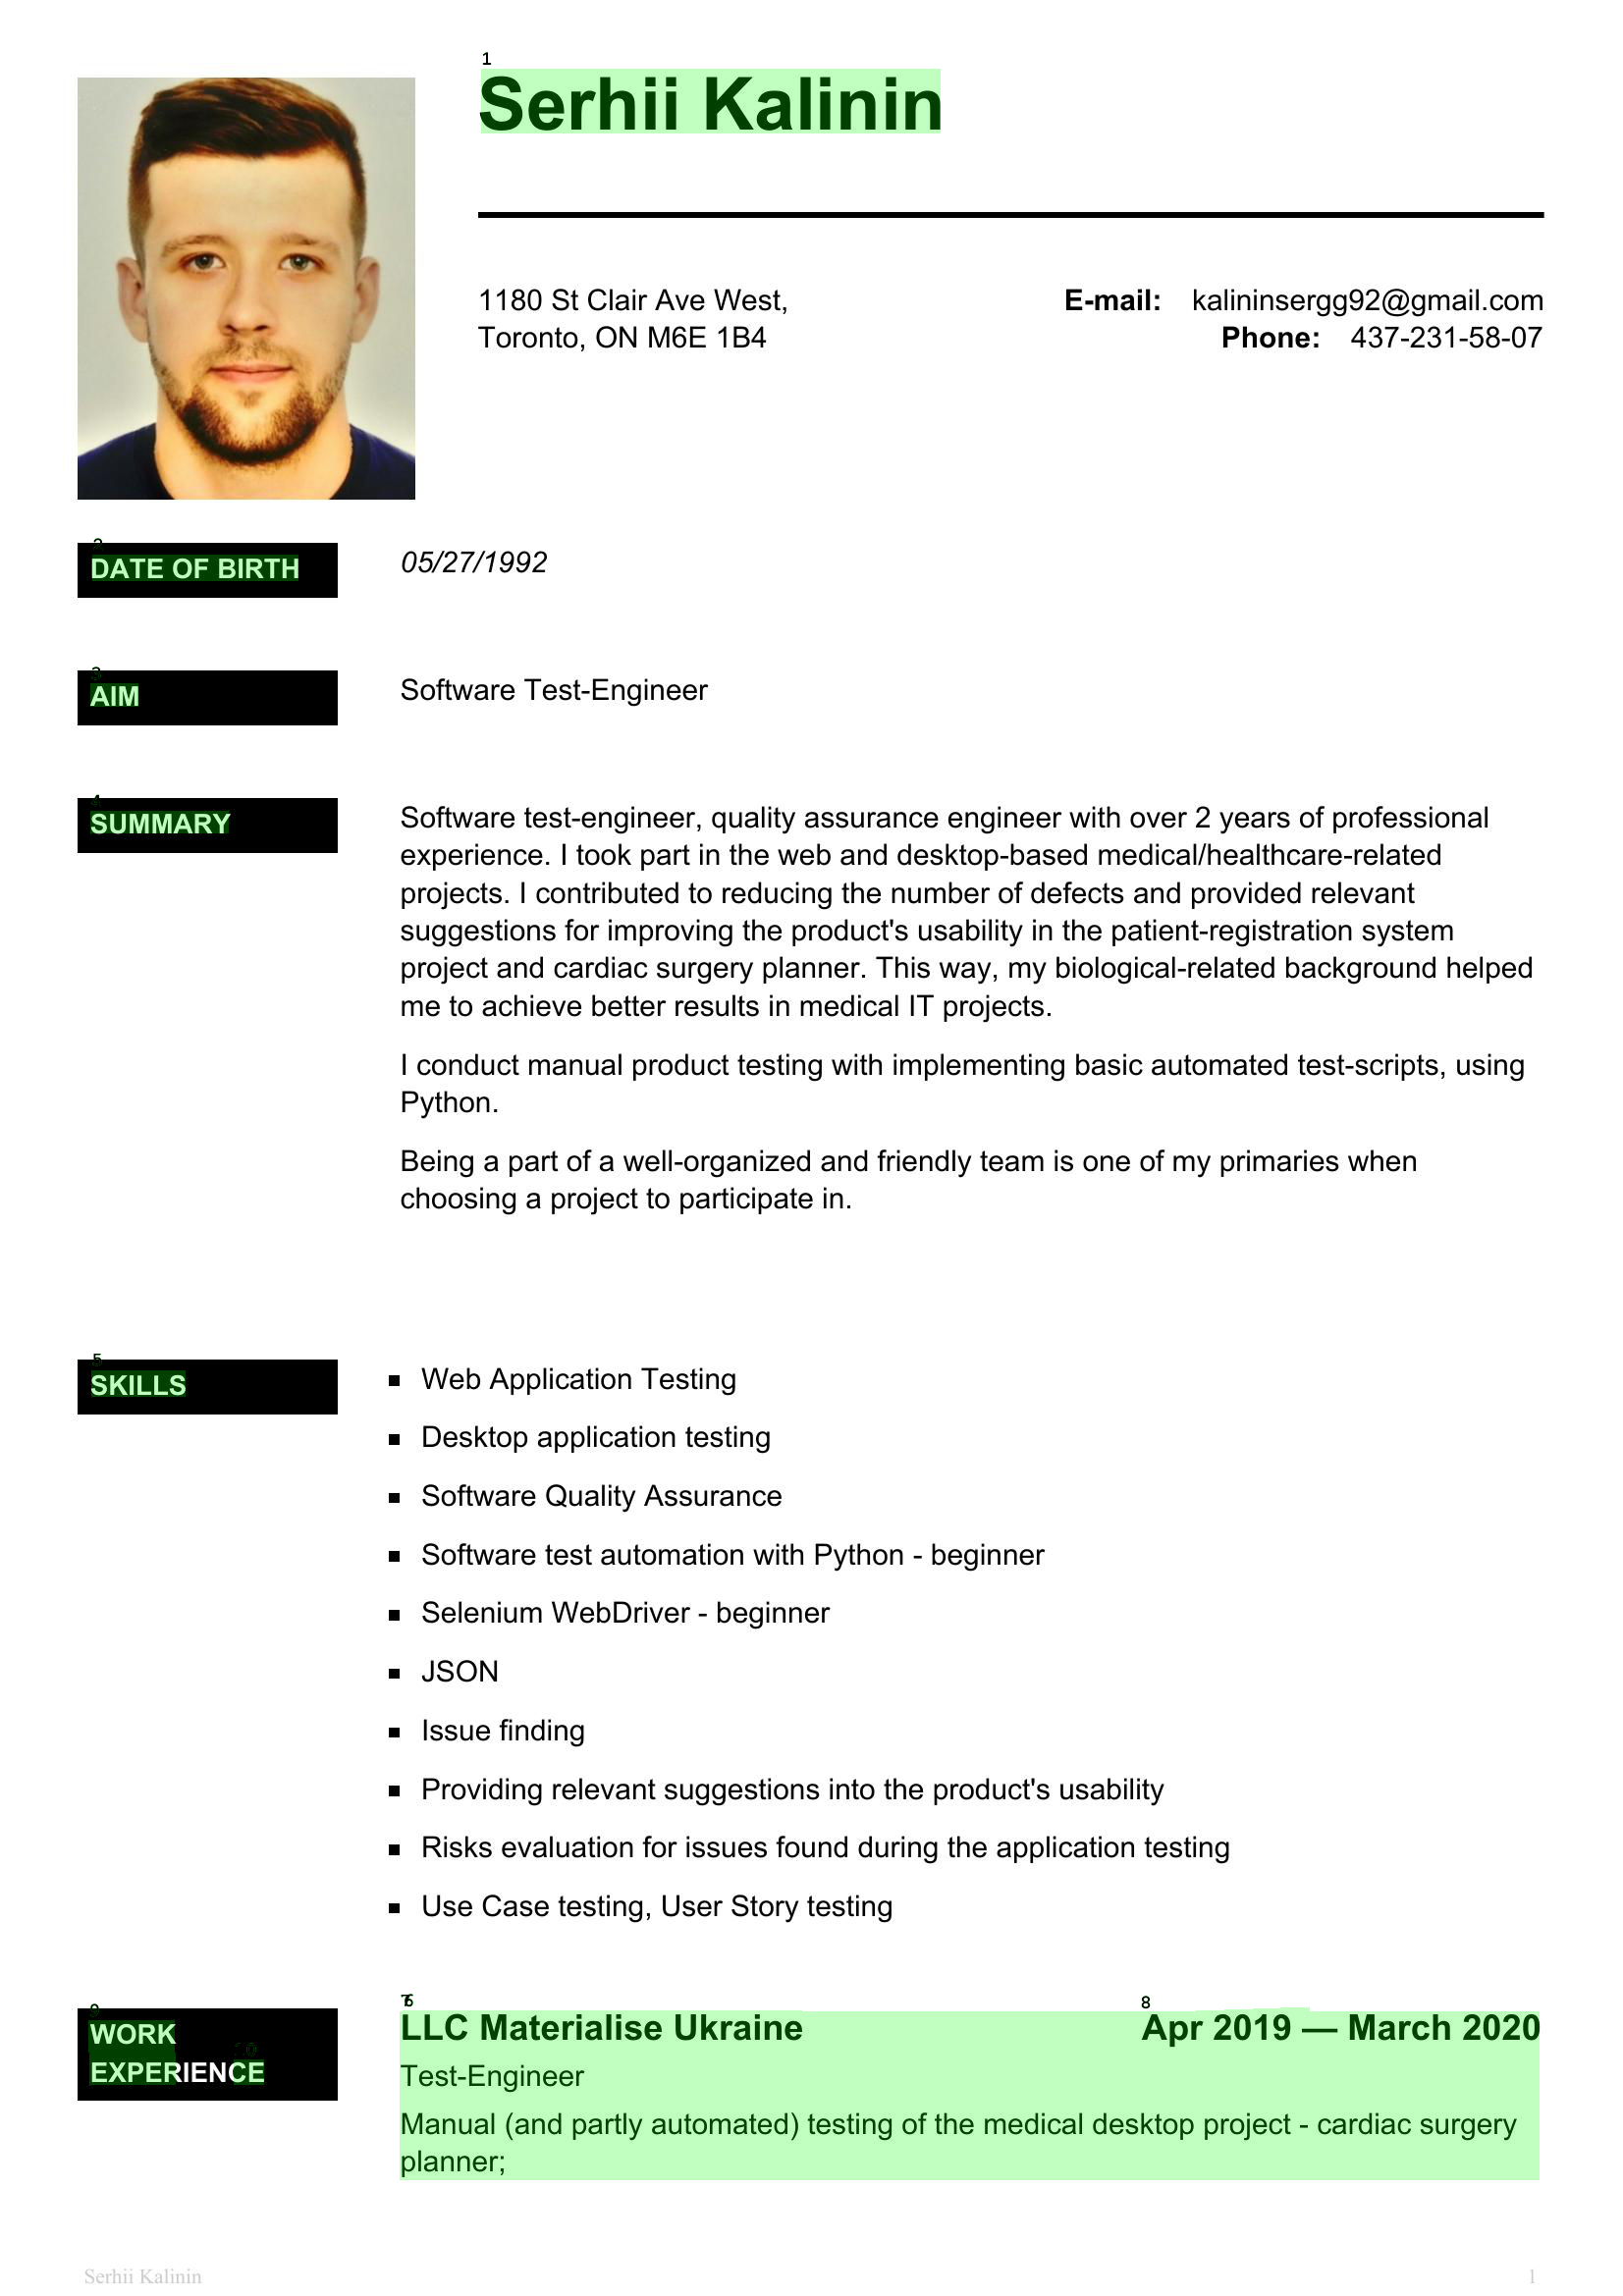

In [58]:
TINT_COLOR = (0,255,0) 
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
font = ImageFont.truetype(fontPath, size=20)
count = 1
for i in finalGroupContains:
    draw.polygon(i[-1][0], fill=TINT_COLOR+(OPACITY,))
    color = 'rgb(0, 0, 0)' # black color
    draw.text((i[-1][0][0][0], i[-1][0][0][1]-20), str(count), fill=color, font=font)
    count+=1
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

# Indentation

In [59]:
tempprocesser= []
for i in finalGroupContains:
    tempprocesser.append(i[-1][0][0][0])
try:
    indentationPoint = statistics.mode(tempprocesser)
except:
    indentationPoint = statistics.median(tempprocesser)
print("Indenation from Left is " +  str(indentationPoint))

Indenation from Left is 92


In [60]:
print(tempprocesser)

[490, 94, 92, 92, 93, 410, 407, 1161, 90, 238]


# Horizontal and Vertical Lines

In [61]:
def show_wait_destroy(winname, img):
    img = cv2.resize(img, (960, 540))   
    cv.imshow(winname, img)
    cv.moveWindow(winname, 500, 0)
    cv.waitKey(0)
    cv.destroyWindow(winname)
def calculateLocationOfLines(picMatrix, horizontal):
    lstofLines = []
    rowNum = 0
    picMatrix = picMatrix if horizontal else picMatrix.T
    for row in picMatrix:
        if any(row) != 0:
            ctStart = 0
            distance = 0
            linePos = False
            for columnSingle in row:
                if columnSingle == 0:
                    ctStart+=1
                    linePos = True
                else:
                    distance+=1
            lstofLines.append([rowNum, ctStart,ctStart+distance, distance])
        rowNum+=1
    return lstofLines
def img2HorizontalLines(horizontal):
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines
    #show_wait_destroy("horizontal", horizontal)
    return horizontal
def checkIfImgExists(img):
    # Load the image
    src = cv2.imread(img, cv2.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print('Error opening image: ' + img)
        raise Exception("ERROR")
    # Show source image
    #cv2.imshow("src", src)
    return src
def findHorizontalLines(img, display):
    src = checkIfImgExists(img)
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    #show_wait_destroy("gray", gray)
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv2.bitwise_not(gray)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # Show binary image
    #show_wait_destroy("binary", bw)
    if display:
        plt.imshow(bw)
        plt.show()
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    
    horizontalConverted = img2HorizontalLines(horizontal)
    
    if display:
        plt.imshow(horizontalConverted)
        plt.show()
    lstofLinesHorizontal = calculateLocationOfLines(horizontalConverted, True)
    print("YPos - Starting - Ending - Distance")
    return lstofLinesHorizontal

In [62]:
def img2VerticalLines(vertical):
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv2.erode(vertical, verticalStructure)
    vertical = cv2.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    #show_wait_destroy("vertical", vertical)
    return vertical
def findVerticalLines(img, display):
    src = checkIfImgExists(img)
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    #show_wait_destroy("gray", gray)
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv2.bitwise_not(gray)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # Show binary image
    #show_wait_destroy("binary", bw)
    if display:
        plt.imshow(bw)
        plt.show()
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    vertical = np.copy(bw)
    
    verticalConverted = img2VerticalLines(vertical)
    
    if display:
        plt.imshow(verticalConverted)
        plt.show()
    lstofLinesVertical = calculateLocationOfLines(verticalConverted, False)
    print("YPos - Starting - Ending - Distance")
    #return lstofLinesVertical, verticalConverted
    return verticalConverted

## Output

In [63]:
verticalOutput = findVerticalLines(imagePath, False)
# print(verticalOutput)
# NOT WORKING

YPos - Starting - Ending - Distance


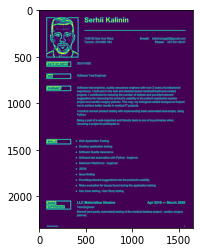

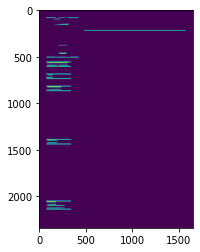

YPos - Starting - Ending - Distance
79
80
81
82
83
84
90
91
102
104
147
150
151
152
153
154
155
156
157
216
217
218
219
220
221
376
377
378
459
460
461
462
463
464
465
466
467
468
502
503
504
505
506
507
508
553
554
555
556
557
558
559
562
563
564
565
566
567
568
589
590
591
592
593
594
595
602
603
604
605
606
607
608
683
684
685
686
687
688
689
694
695
696
697
698
719
720
721
722
723
724
725
732
733
734
735
736
737
738
813
814
815
816
817
818
819
822
823
824
825
826
827
828
849
850
851
852
853
862
863
864
865
866
867
868
1385
1386
1387
1388
1389
1390
1391
1394
1395
1396
1397
1398
1399
1400
1421
1422
1423
1424
1425
1426
1427
1434
1435
1436
1437
1438
1439
1440
2046
2047
2048
2049
2050
2051
2052
2055
2056
2057
2058
2059
2060
2061
2082
2083
2084
2085
2086
2088
2094
2095
2096
2097
2098
2099
2100
2121
2122
2123
2124
2125
2126
2133
2134
2135
2136
2137
2138
2139
[[79, 1349, 1653, 304], [80, 1348, 1653, 305], [81, 1378, 1653, 275], [82, 1387, 1653, 266], [83, 1453, 1653, 200], [84, 1461, 1653,

In [72]:
horizontalOutput = findHorizontalLines(imagePath, True)
for i in horizontalOutput:
    print(i[0])
print(horizontalOutput)

# Y-Points

In [65]:
def countofEach2Lst(lst):
    counterDict = Counter(lst)
    dictList = []
    for key, value in counterDict.items():
        temp = [key,value]
        dictList.append(temp)
    return dictList

In [66]:
yp = []
for i in boldSections:
    yp.append(i[0][0][1])

In [89]:
ctofYs = countofEach2Lst(yp)
finalYpoints = []
for i in ctofYs:
    if i[1] >= 3: finalYpoints.append(i) 

In [90]:
TRANSPARENCY = 0.25
TINT_COLOR = (0,0,0)
font = ImageFont.truetype(fontPath, size=20)
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
x, y= img.size

for yPos,txt in finalYpoints:
    shape = [(0, yPos-5), (x, yPos-5)]
    draw.line(shape, fill ="black", width = 1)
for yPos,txt in finalYpoints:
    color = 'rgb(0, 0, 0)'
    draw.text((0, yPos-5), str(txt), fill=color, font=font)
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.

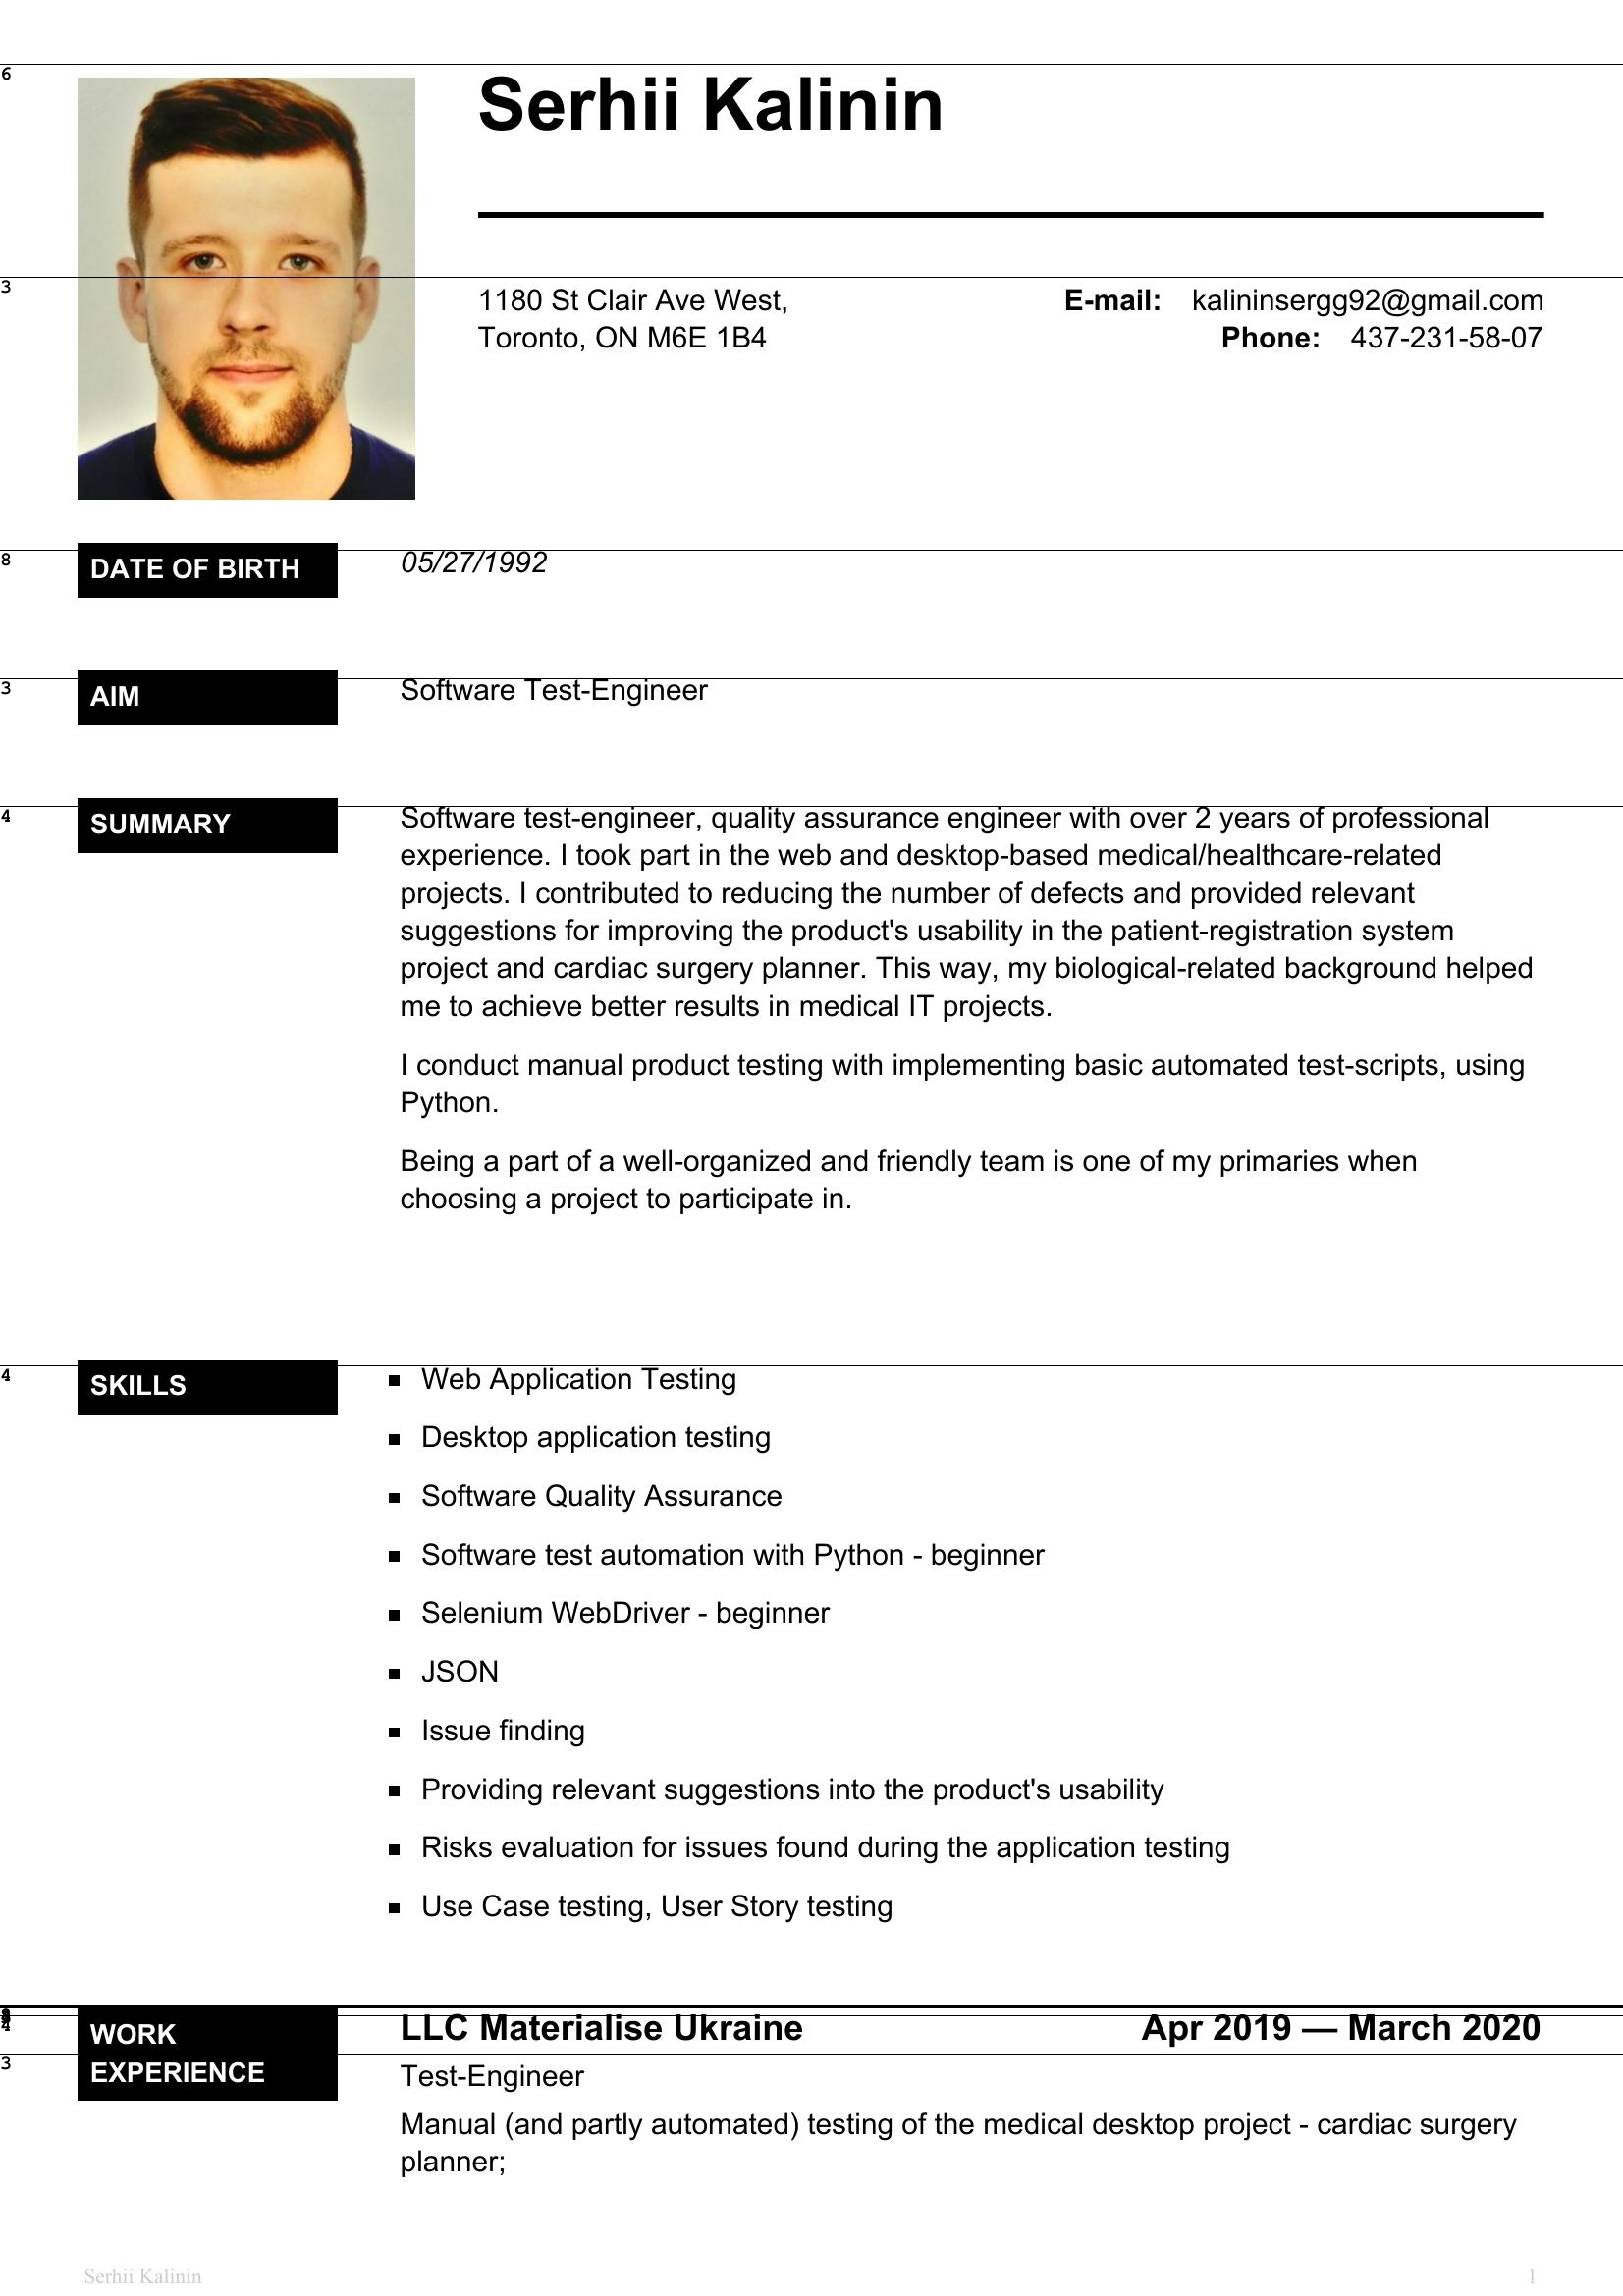

In [91]:
img

In [70]:
finalYpoints

[[70, 6], [565, 8], [2048, 8]]

In [66]:
width, height = img.size 
for num in range(0, len(finalYpoints)-1):
    imgt = img.crop((0, finalYpoints[num][0], width, finalYpoints[num+1][0]))
    #display(imgt)
    print("-------------------------")

-------------------------
-------------------------
-------------------------
-------------------------


In [75]:
scores = []
for i in boldSections:
    scores.append(i[1])
topPercent = np.percentile(scores, 90)
for i in boldSections:
    if i[1]>=topPercent:
        print(i)

In [83]:
for i in boldSections:
    print(i)

[((490, 70), (687, 70), (687, 135), (490, 135)), 105.0, 'Serhii', 'Word']
[((720, 70), (957, 70), (957, 135), (720, 135)), 104.29, 'Kalinin', 'Word']
[((490, 70), (957, 70), (957, 135), (490, 135)), 100.0, 'Serhii ', 'Para']
[((490, 70), (687, 70), (687, 135), (490, 135)), 102.78, 'Serhii', 'SymbolAvg']
[((720, 70), (957, 70), (957, 135), (720, 135)), 94.64, 'Kalinin', 'SymbolAvg']
[((490, 70), (957, 70), (957, 135), (490, 135)), 105.5556, 'N/A', 'SymbolAvg']
[((1086, 286), (1570, 290), (1570, 324), (1086, 320)), 33.3333, 'N/A', 'SymbolAvg']
[((1115, 287), (1171, 287), (1171, 320), (1115, 320)), 25.0, 'mail', 'Word']
[((1086, 287), (1102, 287), (1102, 320), (1086, 320)), 116.67, 'E', 'SymbolAvg']
[((1115, 287), (1171, 287), (1171, 320), (1115, 320)), 18.75, 'mail', 'SymbolAvg']
[((490, 290), (551, 290), (551, 318), (490, 318)), 18.75, '1180', 'SymbolAvg']
[((728, 291), (794, 291), (794, 319), (728, 319)), 32.5, 'West', 'Word']
[((728, 291), (794, 291), (794, 319), (728, 319)), 18.75, '

# Face Detection

In [ ]:
imagePath = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_619_1.jpg"

In [28]:
def findFace(imgPath):
    image = cv2.imread(imgPath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.3,
            minNeighbors=3)
    faceArrayLst = []
    for i in faces:
        faceArrayLst.append(((i[0], i[1]), (i[0]+i[2], i[1]), (i[0]+i[2], i[1]+i[3]), (i[0], i[1]+i[3])))
    return faceArrayLst

In [29]:
faceArray = findFace(imagePath)

In [30]:
print(faceArray)

[]


In [ ]:
TINT_COLOR = (0,255,0) 
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
for i in faceArray:
    draw.polygon(i, fill=TINT_COLOR+(OPACITY,))
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

# Entities

In [100]:
from google.cloud import language_v1
from google.cloud.language_v1 import enums

In [97]:
nlpAutoAPIPath = "/Users/kunal/Documents/VdartResumeProject/APIKEYSGOOGLE/resumeMatcher-NLP_create_data.json"

In [93]:
imgTxtVisionAPIPath = "/Users/kunal/Documents/VdartResumeProject/APIKEYSGOOGLE/resumeMatcher-pdf2img.json"
# ------- Checking for API -------
#Using API from Google and returns a JSON file but text is extracted from it
keyDIR = imgTxtVisionAPIPath #JSON key file to call the api
credentials = service_account.Credentials.from_service_account_file(keyDIR) #using service account to go through google
client = vision.ImageAnnotatorClient(credentials=credentials) # client api
#imagePath = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_402_1.jpg"
bounds = []
with io.open(imagePath, 'rb') as image_file:
    content = image_file.read()
image = types.Image(content=content)
response = client.document_text_detection(image=image)
global document
document = response.full_text_annotation

In [95]:
xx = document.text

In [102]:
def extractMajorEntities(text_content, salienceScoreThres):
    keyDIR = nlpAutoAPIPath # JSON path with the crediatials 
    credentials = service_account.Credentials.from_service_account_file(keyDIR) # same as before api credentials
    client = language_v1.LanguageServiceClient(credentials=credentials)  # language client 
    type_ = enums.Document.Type.PLAIN_TEXT 
    language = "en" # english text
    document = {"content": text_content, "type": type_, "language": language} #formatting the design of api input -- leave it
    encoding_type = enums.EncodingType.UTF8 # reading the document -- must have 
    response = client.analyze_entities(document, encoding_type=encoding_type) # actual run of the api
    majorValues = []
    for entity in response.entities:  #reading the JSON that was returned by analyze entities
        if entity.salience > salienceScoreThres: #salience score is the importance of the entity compared to the full document
            majorValues.append([entity.name,entity.salience]) # if it is greater than the threshold then save it and return it
    return  response

In [103]:
z = extractMajorEntities(xx, 0)

In [106]:
response = z

In [107]:
nonuseEntities = ["OTHER", "NUMBER"] # attributes of the entities that dont matter and are of no use
allEntitiesExtracted = []
for entity in response.entities: # loop through json and see all entities
    currentRunningEntity = []
    #print(entity.name)
    #print(enums.Entity.Type(entity.type).name)
    if enums.Entity.Type(entity.type).name not in nonuseEntities: # check if meta data from entity is important
        #print("Detected " + entity.name + " as " + enums.Entity.Type(entity.type).name)
        currentRunningEntity.append(entity.name)
        currentRunningEntity.append(enums.Entity.Type(entity.type).name)
        allEntitiesExtracted.append(currentRunningEntity) # append it to list 
    else: 
        for mention in entity.mentions:
            if enums.EntityMention.Type(mention.type).name == "PROPER":
                #print("Detected " + mention.text.content + " as " + enums.EntityMention.Type(mention.type).name)
                currentRunningEntity.append(mention.text.content)
                currentRunningEntity.append(enums.EntityMention.Type(mention.type).name)
                allEntitiesExtracted.append(currentRunningEntity) # another check if it entity is important 
                # must see format or return entity to see how this is working 
    #allEntitiesExtracted.append(currentRunningEntity) if currentRunningEntity != [] else print("-")
    #allEntitiesExtracted.append(currentRunningEntity)   

In [108]:
allEntitiesExtracted

[['Phone', 'CONSUMER_GOOD'],
 ['M6E 1B4', 'PROPER'],
 ['ON', 'LOCATION'],
 ['Toronto', 'LOCATION'],
 ['Serhii Kalinin 1180 St Clair Ave West', 'LOCATION'],
 ['Software test-engineer', 'PERSON'],
 ['quality assurance engineer', 'PERSON'],
 ['AIM', 'PROPER'],
 ['application testing', 'EVENT'],
 ['product', 'CONSUMER_GOOD'],
 ['test-scripts', 'WORK_OF_ART'],
 ['team', 'ORGANIZATION'],
 ['product', 'CONSUMER_GOOD'],
 ['usability Risks evaluation', 'WORK_OF_ART'],
 ['Python', 'ORGANIZATION'],
 ['Test-Engineer Manual', 'CONSUMER_GOOD'],
 ['JSON', 'PROPER'],
 ['Serhii Kalinin', 'PERSON'],
 ['WORK EXPEI CE LLC Materialise Ukraine', 'ORGANIZATION'],
 ['Selenium WebDriver', 'PROPER'],
 ['05/27/1992', 'DATE'],
 ['Apr 2019', 'DATE'],
 ['March 2020', 'DATE'],
 ['1180 St Clair Ave West,\nToronto, ON M6E 1B4', 'ADDRESS']]

# Im tired

In [113]:
folder1 = "/Users/kunal/Documents/VdartResumeProject/textFilespart1/"
folder2 = "/Users/kunal/Documents/VdartResumeProject/textFilespart2/"

In [123]:
stringFINALBULL = """{"textSnippet":{"content":"TEXTTEXT"},"annotations":[{"displayName":"NAME","textExtraction":{"textSegment":{"startOffset":"0","endOffset":"10"}}}]}"""
FINALJSON = ""
for i in os.listdir(folder1):
    try:
        f = open(folder1 + i, "r")
        xx = stringFINALBULL.replace("TEXTTEXT",f.read())
    except:
        pass
    
    FINALJSON = FINALJSON + xx

In [117]:
f.read()

''

In [124]:
FINALJSON

'{"textSnippet":{"content":"NISARGA HASSAN SREEDHAR\nSan Jose, California |+1 (925) 789-8911| nisarga.nishu20@gmail.com | www.linkedin.com/in/nisarga-sreedhar-39938516b\nEDUCATION:\nMaster\'s in Electrical Engineering (Computer Networking), San Jose State University, California, USA.\nCoursework: Internetworking, Broadband communications, Network Security, Internet of Things (IoT), Voice over IP\nBachelor of Engineering in Telecommunication Engineering, Dayananda Sagar College of Engineering, Visvesvaraya\nTechnological University, India\nMay 2020\nJune 2017\nTECHNICAL SKILLS:\nNetwork technologies: HTTP, DNS, DHCP, HTTPS, TLS-SSL, TCP/IP, UDP, IPV4, IPV6, ICMP, OSPF, BGP, ARP, VLAN, STP,\nSIP, IPS, IDS, NAT, IS-IS, 802.11, MPLS, WPA2, WPA3, Packet level troubleshooting\nProgramming: Python\nOS Platform: Linux (Ubuntu, CentOS), Kali Linux, Cisco IOS\nTools and IDE: Advanced Design System (ADS), Wireshark, VMware Workstation, VirtualBox, GNS3, Cisco Packet Tracer, PUTTY\nCERTIFICATION:\

In [ ]:
stringFINALBULL.replace("TEXTTEXT",)

In [ ]:
FINALJSON = ""